<center>
<h1> TP-Projet d'optimisation num√©rique </h1>
<h1> Algorithme du lagrangien augment√© </h1>
</center>

## Impl√©mentation

1. Impl√©menter l'algorithme du lagrangien augment√©, en utilisant les diff√©rentes m√©thodes
qui ont √©t√© vues en premi√®re partie pour la r√©solution de la suite de probl√®mes sans
contraintes (fichier `src/lagrangien_augmente.jl`). La sp√©cification est donn√©e dans le fichier.
2. V√©rifier que les tests ci-dessous passent.
 

In [1]:
include("../src/lagrangien_augmente.jl")
include("../test/tester_lagrangien_augmente.jl")

#
afficher = false # si true, alors affiche les r√©sultats des algorithmes

#
tester_lagrangien_augmente(lagrangien_augmente, afficher);

Affichage des r√©sultats des algorithmes : false



Test Summary:         | Pass  Total   Time


Lagrangien augment√©   |   12     12  10.1s


## Interpr√©tation

 1. Commenter les r√©sultats obtenus, en √©tudiant notamment les valeurs en sortie de $\lambda_k$ et $\mu_k$.
 2. √âtudier l'influence du param√®tre $\tau$ dans la performance de l'algorithme. Pour cela Vous r√©aliserez des tests num√©riques.

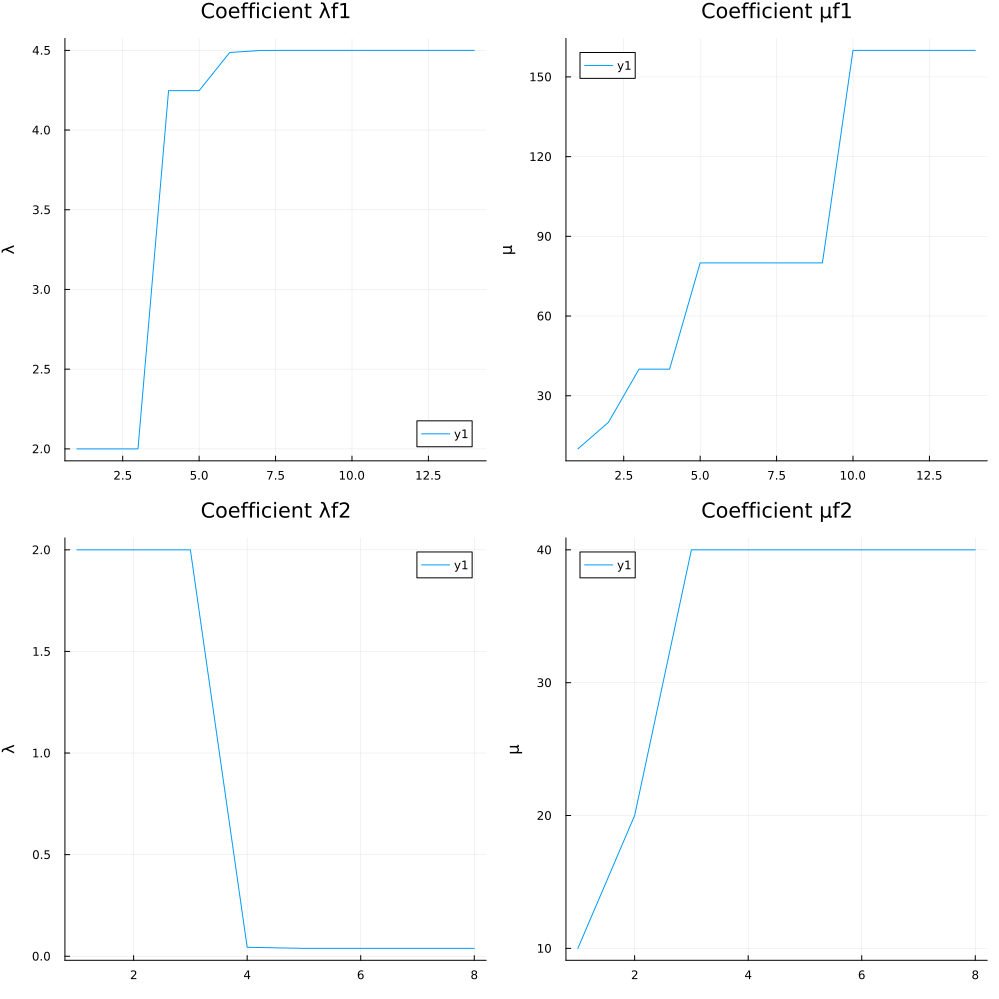

In [2]:
# Exp√©rimentations num√©riques √† faire ici.
# Vous pouvez utiliser le package Plots pour les affichages de courbes: using Plots
include("../src/regions_de_confiance.jl")
include("../src/newton.jl")
include("../src/lagrangien_augmente.jl")
include("../test/fonctions_de_tests.jl")
using Plots

# Fonction de test 1
_,_,_,_,Œºf1,Œªf1 = lagrangien_augmente(fct1, grad_fct1, hess_fct1, contrainte1, grad_contrainte1, hess_contrainte1, x01, algo_noc="newton")

# ùúÜùëò
Œª_courbe_1 = plot(Œªf1, xlabel = "", ylabel = "Œª", title = "Coefficient Œªf1")

# ùúáùëò
Œº_courbe_1 = plot(Œºf1, xlabel = "", ylabel = "Œº", title = "Coefficient Œºf1")

# Fonction de test 2
_,_,_,_,Œºf2,Œªf2 = lagrangien_augmente(fct2, grad_fct2, hess_fct2, contrainte2, grad_contrainte2, hess_contrainte2, x04)

# ùúÜùëò
Œª_courbe_2 = plot(Œªf2, xlabel = "", ylabel = "Œª", title = "Coefficient Œªf2")

# ùúáùëò
Œº_courbe_2 = plot(Œºf2, xlabel = "", ylabel = "Œº", title = "Coefficient Œºf2")

# Affichage des courbes
plot(Œª_courbe_1, Œº_courbe_1, Œª_courbe_2, Œº_courbe_2, layout = (2,2), size = (1000,1000))

**Q1** Nous remarquons que le facteurs de p√©nalit√© Œº augmente de facon signicative dans la r√©solution du probl√®me 1, puisque pour la fonction f1 l'optimisation se rapproche plus rapidement de la solution r√©alisable du probl√®me, c√†d l'algorithme converge plus rapidement vers la solution qui satisfait les contraintes du probl√®me, contrairement √† la fonction f2 d'o√π la diff√©rence de la pente des deux courbes de Œº.
Pour Œª, on remarque qu'il augmente au fur et √† mesure que le nombre d'it√©ration augmente ce qui veut dire que l'optimisation se d√©vie des contraintes, contrairement √† f2, on voit que le coefficient diminue au cours des it√©rations ce qui montre que l'optimisation pour la fonction f2 est en bon chemin et respecte les contraintes impos√©es.

**Q2**

In [3]:
include("../src/regions_de_confiance.jl")
include("../src/newton.jl")
include("../src/lagrangien_augmente.jl")
include("../test/fonctions_de_tests.jl")
using Plots

# Effet de tau sur les performances de l'algorithme
tau = range(1, 10, length = 10)
nb_iterations = zeros(50)
for i in 1:50
    _,_,_,nb_iterations[i],_,_ = lagrangien_augmente(fct1, grad_fct1, hess_fct1, contrainte1, grad_contrainte1, hess_contrainte1, x01, œÑ = tau[i])
end

# Affichage
plot(tau, nb_iterations, xlabel = "œÑ", ylabel = "Nombre d'it√©rations", title = "Effet de tau sur les performances de l'algorithme")

--> Je n'ai pas pu interpr√©ter √† partir de la courbe car elle a pris beaucoup de temps mais ne veut toujours pas se dessiner.

En g√©n√©ral, une augmentation de $\tau$ peut acc√©l√©rer la croissance de Œº au fil des it√©rations, cela peut intensifier la p√©nalit√© pour les violations de contraintes, incitant potentiellement l'algorithme √† converger plus rapidement vers une solution r√©alisable. Mais, une valeur excessive de ce $\tau$ pourrait conduire √† une surp√©nalisation, ce qui peut rendre l'optimisation plus sensible. Cela pourrait potentiellement entra√Æner une convergence instable.